<a href="https://colab.research.google.com/github/vicky30mar82/PyTorch/blob/main/MNIST_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn

In [ ]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])
training_datasets = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
validation_datasets = datasets.MNIST(root = './data', train = False, download = True, transform = transform)

training_loader = torch.utils.data.DataLoader(dataset = training_datasets, batch_size = 100, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_datasets, batch_size = 100, shuffle = False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
def im_convert(tensor):
  image =  tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  #print(image.shape)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image =image.clip(0, 1)
  return image

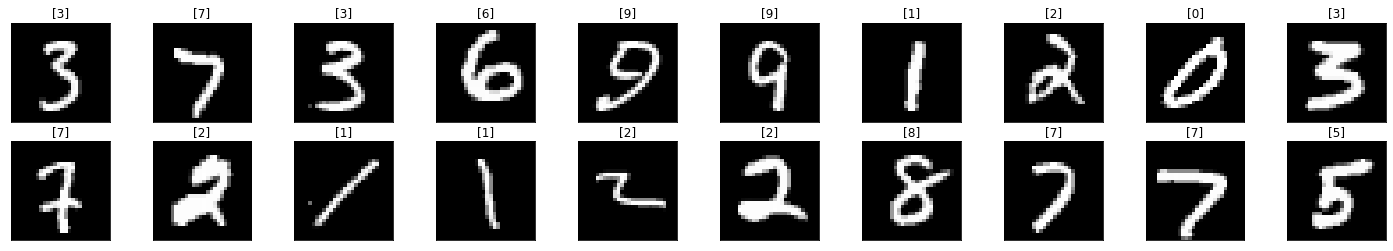

In [ ]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize =  (25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks =[], yticks =[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [ ]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [ ]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [ ]:
epochs = 12
running_loss_history = []
running_correct_history = []
val_running_loss_history = []
val_running_correct_history = []
for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0

  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects +=torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects +=torch.sum(val_preds == val_labels.data)


    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_correct_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_correct_history.append(val_epoch_acc)

    print('training loss: {:.4f}, {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

training loss: 0.9370, 76.9450 
validation loss: 0.4177, 88.6700 
training loss: 0.3703, 89.6283 
validation loss: 0.3112, 91.1700 
training loss: 0.3066, 91.2117 
validation loss: 0.2764, 92.1000 
training loss: 0.2734, 92.2000 
validation loss: 0.2542, 92.3700 
training loss: 0.2501, 92.8200 
validation loss: 0.2320, 93.2700 
training loss: 0.2295, 93.3683 
validation loss: 0.2219, 93.6400 
training loss: 0.2127, 93.9067 
validation loss: 0.2050, 94.2300 
training loss: 0.1962, 94.3883 
validation loss: 0.1912, 94.2900 
training loss: 0.1826, 94.7767 
validation loss: 0.1768, 94.8200 
training loss: 0.1702, 95.1033 
validation loss: 0.1643, 95.0300 
training loss: 0.1584, 95.4467 
validation loss: 0.1577, 95.3300 
training loss: 0.1484, 95.7400 
validation loss: 0.1508, 95.5200 


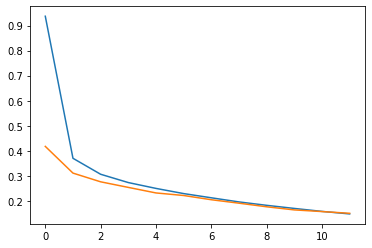

In [ ]:
plt.plot(running_loss_history, label = 'Training Loss')
plt.plot(val_running_loss_history, label = 'Validation Loss')

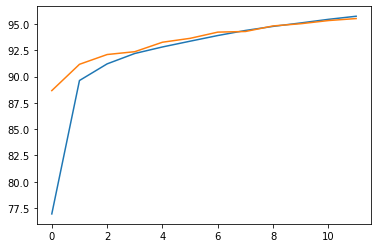

In [ ]:
plt.plot(running_correct_history, label = 'Training Acc')
plt.plot(val_running_correct_history, label = 'Val Acc')

In [ ]:
!pip3 install pillow = 4.0.0

ERROR: Invalid requirement: '='
Hint: = is not a valid operator. Did you mean == ?


In [ ]:
import PIL.ImageOps

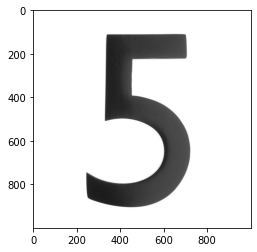

In [ ]:
import requests 
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)


In [ ]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

OSError: ignored

In [ ]:
img = img.view(img.shape[0], -1)
outputs = model(img)
_, preds = torch.max(outputs, 1)
print(preds.item())

5
